# Natural Language Processing (NLP) 
### University of California, Berkeley - Spring 2022

## Today's subjects:

- Natural Language Processing (NLP)
- Gensim's introduction
- Word2Vec

Natural language processing (NLP) is one of the most important technologies of the information age. Understanding complex language utterances is also a crucial part of artificial intelligence. Applications of NLP are everywhere because people communicate most everything in language: web search, advertisement, emails, customer service, language translation, radiology reports, etc. There are a large variety of underlying tasks and machine learning models behind NLP applications. In recent years, deep learning approaches have obtained very high performance across many different NLP tasks. These can solve tasks with single end-to-end models and do not require traditional, task-specific feature engineering. In this winter quarter course students will learn to implement, train, debug, visualize and invent their own neural network models. The course provides a thorough introduction to cutting-edge research in deep learning applied to NLP. On the model side we will cover word vector representations, window-based neural networks, recurrent neural networks, long-short-term-memory models, recursive neural networks, convolutional neural networks as well as some recent models involving a memory component. Through lectures and programming assignments students will learn the necessary engineering tricks for making neural networks work on practical problems. In this course, students will gain a thorough introduction to cutting-edge research projects in Deep Learning with NLP. 

![image.png](NLP.png)

Reference: https://chatbotslife.com/natural-language-principles-65e88e20b94

__NOTE__: This notebooks requires basic knowledge of Python. If you are not familiar with Python, checkout this course's introduction to python notebooks.

There are different levels of tasks in NLP, from speech processing to semantic interpretation and discourse processing. The goal of NLP is to be able to design algorithms to allow computers to "understand" the natural language in order to perform some task. Some of the tasks are listed as following:

- Spell Checking 
- Keyword Search
- Finding Synonyms
- Parsing information from websites, documents, etc
- Machine Translation (e.g. English to French Translation)
- Semantic Analysis (e.g. What is the meaning of this statement?)
- Question Answering

## Word Representations

The first and arguably most important common denominator across all NLP tasks is how we represent words as input to any of our models. To perform well on most NLP tasks we first need to have some notion of similarity and difference between words. We can encode words into __word vectors__. A word vector is supposed to contain the meaning of the word and represent the word as a point in a multi-dimensional space.

There are an estimated 13 million tokens for the English language. Are they all completely unrelated? Ofcourse they are related. Thus, we want to encode word tokens each into some numeric vector that represents a point in multi-dimensional space which we'll call "word" space. One intuition is that perhaps there actually exists some N-dimensional space (such that N << 13 million) that is sufficient to encode all semantics of our language. Each dimension would encode some meaning that we transfer using speech. For instance, some dimensions will indicate tense (past vs. present vs. future), count (singular vs. plural),
and gender (masculine vs. feminine).

There are a number of methods to calculate word vectors:

- One-hot vectors
- SVD based Methods (Out of context of this course)
- Iteration Based Methods
    * Language Models (N-grams)
    * Continuous Bag of Words (CBOW)
    * SkipGram Model

### One-hot Vectors

In this simple approach, each word vector has the length of the vocabulary (which is really really high!). we will represent each word with a vector of all zeros and one 1 at the index of the word in the sorted english language. As can be inferred from this word vectors, the distance between each word is equal to distance of any other pair of words. Also, each pair of words dot product will result to zero, meaning that we represent each word as a complete independent entity in our "word" space. In this "word" space, Each dimension represents a different word. Indeed, each word is a unit vector streched in the direction its corresponding dimension in the "word" space. 


As can be seen, the main issue with this approach is that the dimensionality of the "word" space is too high. We can find a much much smaller subspace that encodes the relationship between the words.

### Iteration Based Models

In another well known approach in encoding words into a "word" space, which is "iteration based" family of models, we can try to create a model that will be able to learn one iteration at a time and eventually be able to encode the probability of a word given its context. One of the first and famous approaches is called `Word2Vec`. We will give you a brief introduction about word2vec algorithm in the following sections.

#### Word2Vec

The Word2Vec's idea is to design a model whose parameters are the word vectors. Then, train the model on a certain objective. At every iteration
we run the model, evaluate the errors, and follow an update rule that has some notion of penalizing the model parameters that caused the error. Thus, we learn our word vectors. Word2Vec is developed by Mikolov et. al which includes 2 algorithms:

- Continuous Bag Of Words (CBOW)
- Skip-gram

Consider this example for the rest of this lecture:

<center>"The cat jumped over the puddle."</center>

#### Iteration Based Models: CBOW

<center>
    <img src="./CBOW.jpg" width="500"/>
</center>

Reference: https://srishtee-kriti.medium.com/mathematics-behind-continuous-bag-of-words-cbow-model-1e54cc2ecd88

CBOW aims to predict a center word from the surrounding context in terms of word vectors. In this approach, we treat {"The", "cat", ’over", "the’, "puddle"} as a context and from these words, we aim to predict or generate the center word "jumped". This type of model we call a Continuous Bag of Words (CBOW) Model.

#### Iteration Based Models: SkipGram

<center>
    <img src="./skipgram.png" width=500/>
</center>

Reference: https://www.researchgate.net/figure/The-architecture-of-Skip-gram-model-20_fig1_322905432

Skip-gram does the opposite, and predicts the distribution (probability) of context words from a center word. In this approach the goa to create a model such that given the center word "jumped", the model will be able to predict or generate the surrounding words "The", "cat", "over", "the", "puddle". Here we call the word "jumped" the context. We call this type of model a SkipGram model.

<center>
    <img src="./skipgram-2.png"/>
    <center><p><center><a href="https://trailhead.salesforce.com/fr/content/learn/modules/word-meaning-and-word2vec/get-started-with-word2vec">Word2Vec Skipgram model with window size 2</a></center></p></center>
</center>


## Gensim installation

We'll use `gensim` package in order to gain some basic insights about NLP. In order to install `gensim`, run the following cell:

In [1]:
!pip install gensim

     |████████████████████████████████| 24.0 MB 825 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 1.2 MB/s eta 0:00:01


## Let's start with Word Vectors

Word Vectors (a.k.a. word embeddings) are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. 

Here, you will explore two types of word vectors: those derived from co-occurrence matrices, and those derived via GloVe.

In [17]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150


from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from the Glove page. They're inside this zip file

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [3]:
glove_file = datapath('/home/mohsen/data/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/tmp/ipykernel_21492/2273095403.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [5]:
model.most_similar('clinton')

[('bush', 0.923926830291748),
 ('obama', 0.8960004448890686),
 ('gore', 0.8393104076385498),
 ('dole', 0.8317812085151672),
 ('mccain', 0.8226957321166992),
 ('barack', 0.8181694149971008),
 ('hillary', 0.7945172786712646),
 ('rodham', 0.7870780229568481),
 ('aides', 0.7797009944915771),
 ('cheney', 0.7665020227432251)]

In [6]:
model.most_similar('apple')

[('microsoft', 0.7449405193328857),
 ('ibm', 0.6821643114089966),
 ('intel', 0.6778088212013245),
 ('software', 0.6775422692298889),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.6617538332939148),
 ('iphone', 0.6595612168312073),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579389572144)]

In [7]:
model.most_similar(negative='apple')

[('hizon', 0.476315438747406),
 ('waly', 0.4709792733192444),
 ('marc-andre', 0.4691624343395233),
 ('kashinath', 0.4621971845626831),
 ('jharkand', 0.45896580815315247),
 ('belkhadem', 0.45566409826278687),
 ('joal', 0.45194777846336365),
 ('römischen', 0.45179906487464905),
 ('aldona', 0.45006662607192993),
 ('hincmar', 0.4497555196285248)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [9]:
def analogy(x2, x1, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy('iranian', 'iran', 'america')

'american'

In [11]:
analogy('tallest', 'tall', 'long')

'longest'

In [12]:
analogy('fantastic', 'good', 'bad')

'terrible'

In [13]:
analogy('waitress', 'waiter', 'actor')

'actress'

In [14]:
len(model.key_to_index.keys())

400000

In [18]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
        
    plt.show()

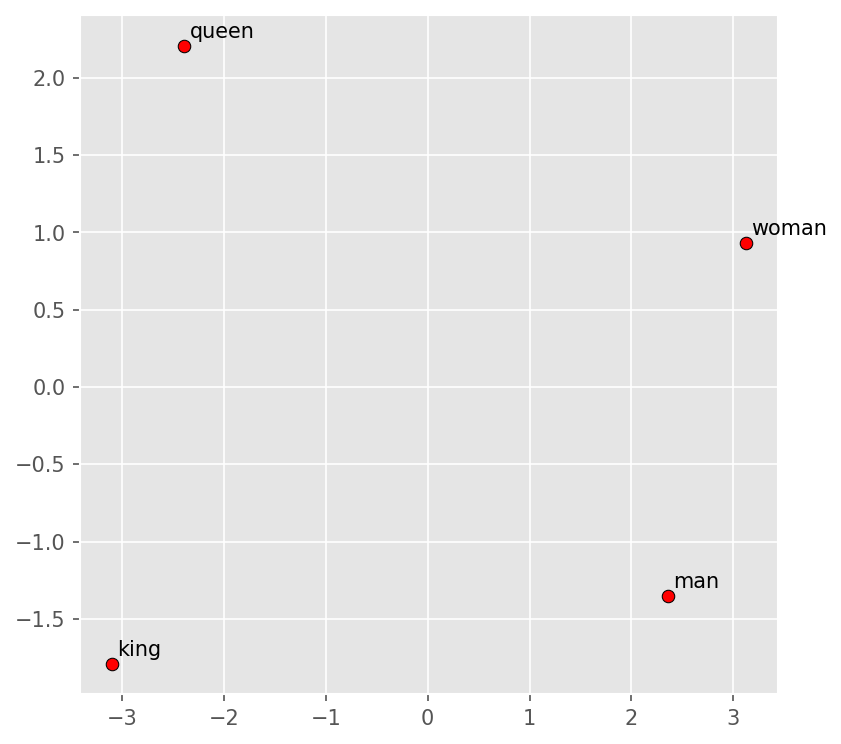

In [19]:
display_pca_scatterplot(model, 
                        ['man', 'woman', 'king', 'queen'])

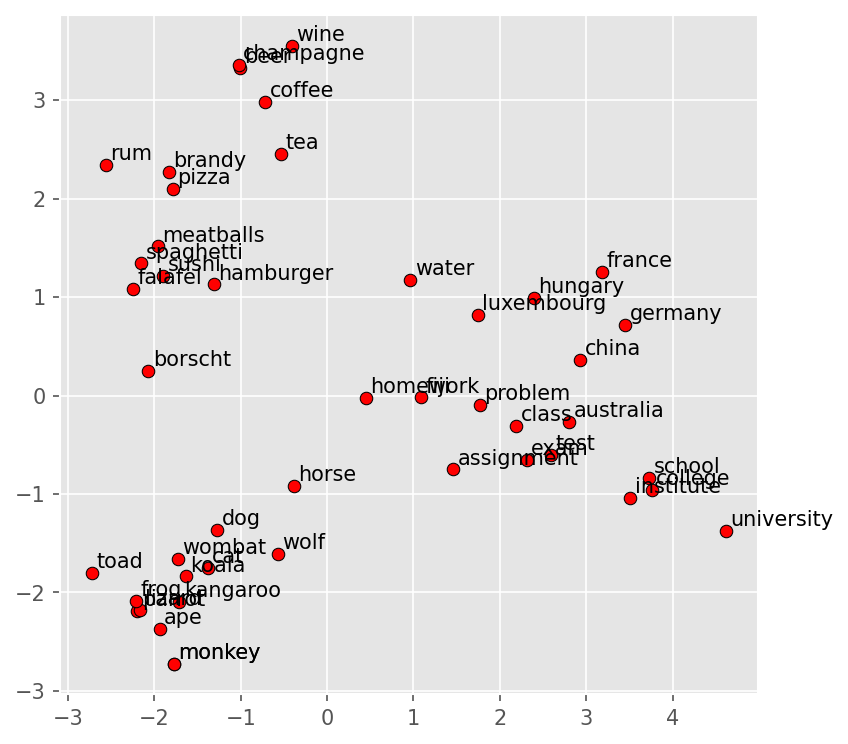

In [20]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

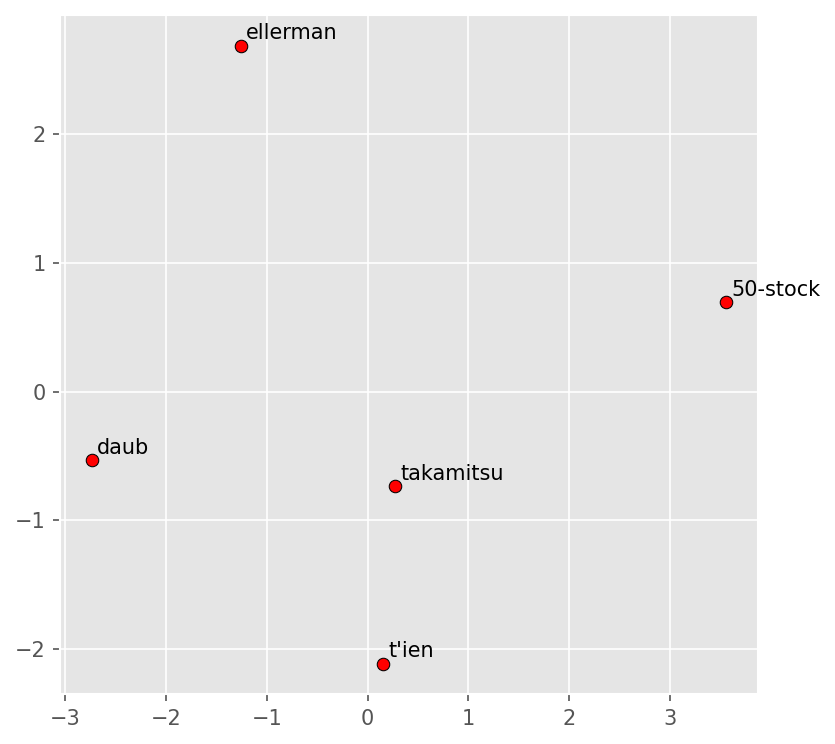

In [26]:
display_pca_scatterplot(model, sample=5)

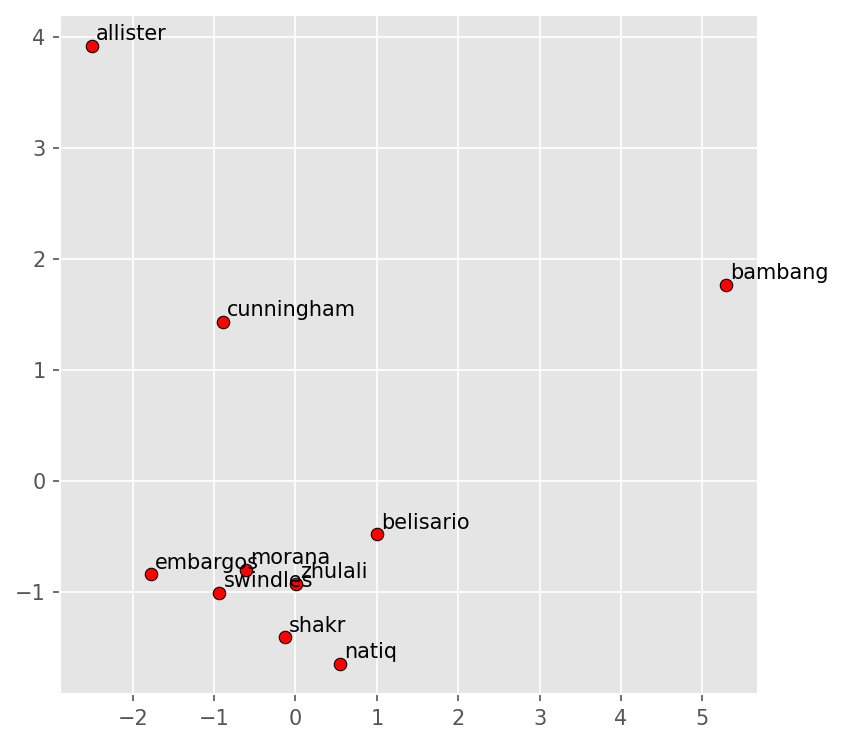

In [27]:
display_pca_scatterplot(model, sample=10)

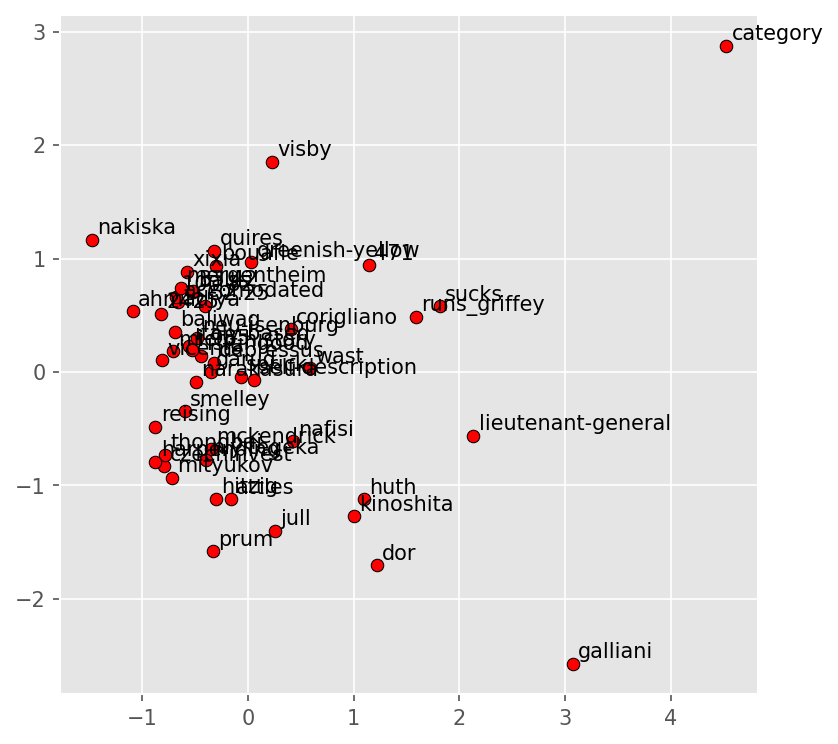

In [28]:
display_pca_scatterplot(model, sample=50)

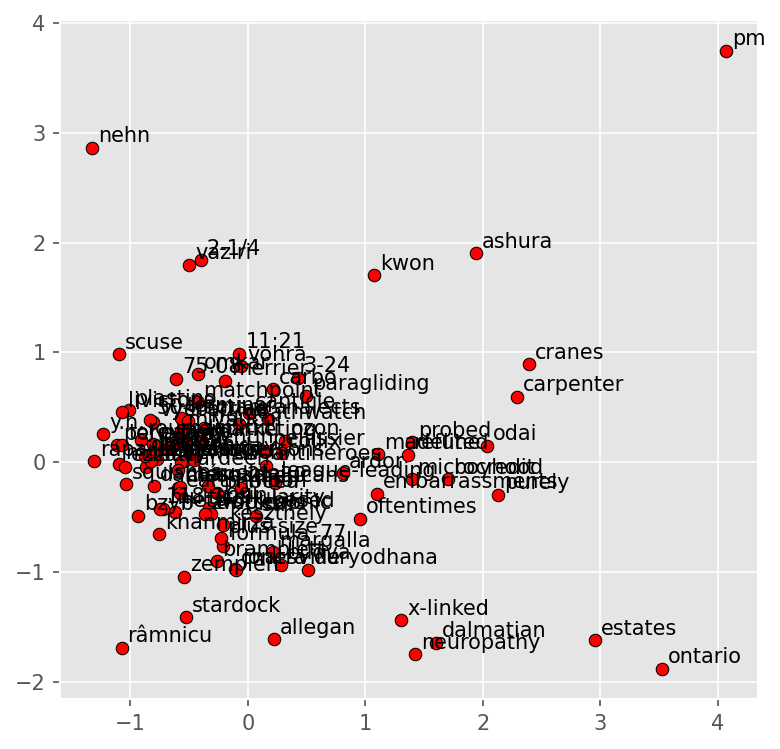

In [29]:
display_pca_scatterplot(model, sample=100)

## Congrats!

The notebook is available at https://github.com/Naghipourfar/molecular-biomechanics/